### Association Rules
- This is an unsupervised technique to unravel any pattern or relation between items/entities
- The algorithm that is used to extract these associations is apriori algorithm that has a downward closure property
- The rules that we obtain depend on basically three factors known as support, confidence and lift
- The rule is created, for eg:  A=> (implies) B i.e is if A is purchased B is also purchased 
  - If support is very high, it implies that the rule is clearly evident and trivial. In most of the transactions you have A and B. Hence we generally give low support to extact hidden associations
  - If confidence is very high, it implies the rule is strong.
  - If lift is high then the association is very strong
- Ideally, we look for rules that have low support, high confidence and high lift

In [20]:
#!pip install mlxtend

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend : Machine learning extensions

In [21]:
#Read the data 
trans=pd.read_csv("Transactions.csv",header=None)
trans.head()

0          1
0  1001  Choclates
1  1001     Pencil
2  1001     Marker
3  1002     Pencil
4  1002  Choclates

In [22]:
trans.columns=['Id','Items']

In [38]:
basket1= pd.crosstab(trans.Id, trans.Items).astype('bool').astype('int')
basket1.columns.name=None
basket1.index.name=None
basket1

Choclates  Coke  Cookies  Eraser  Marker  Pencil
1001          1     0        0       0       1       1
1002          1     0        0       0       0       1
1003          0     1        0       1       0       1
1004          1     0        1       0       0       1
1005          0     0        0       0       1       0
1006          0     0        0       0       1       1
1007          1     0        0       0       0       1
1008          1     0        1       0       0       1
1009          0     0        0       0       1       1
1010          0     1        0       0       1       0

In [39]:
#This data, if we observe, is in the melt form and we need to get all items for transactions in a row i.e
# for one trannsaction we need to have only one row
#basket= trans.groupby(['Id','Items'])['Items'].sum().unstack().reset_index().fillna(0).set_index('Id')
#basket[basket !=0]=1

In [40]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)
print(frequent_itemsets )

   support                      itemsets
0      0.5                   (Choclates)
1      0.2                        (Coke)
2      0.2                     (Cookies)
3      0.1                      (Eraser)
4      0.5                      (Marker)
5      0.8                      (Pencil)
6      0.2          (Cookies, Choclates)
7      0.1           (Choclates, Marker)
8      0.5           (Choclates, Pencil)
9      0.1                (Coke, Eraser)
10     0.1                (Coke, Marker)
11     0.1                (Coke, Pencil)
12     0.2             (Cookies, Pencil)
13     0.1              (Eraser, Pencil)
14     0.3              (Marker, Pencil)
15     0.2  (Cookies, Choclates, Pencil)
16     0.1   (Choclates, Marker, Pencil)
17     0.1        (Coke, Eraser, Pencil)


In [41]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

antecedents  consequents  antecedent support  consequent support  support  \
0    (Cookies)  (Choclates)                 0.2                 0.5      0.2   
1  (Choclates)    (Cookies)                 0.5                 0.2      0.2   
2  (Choclates)     (Pencil)                 0.5                 0.8      0.5   
3     (Pencil)  (Choclates)                 0.8                 0.5      0.5   
4       (Coke)     (Eraser)                 0.2                 0.1      0.1   

   confidence  lift  leverage  conviction  
0       1.000  2.00      0.10         inf  
1       0.400  2.00      0.10    1.333333  
2       1.000  1.25      0.10         inf  
3       0.625  1.25      0.10    1.333333  
4       0.500  5.00      0.08    1.800000

In [42]:
[# leverage is: difference betweeb frequency of item A and B together and expected freq of A and B if they are independent.# support(A=>B)-support(A)*support(B) 
# Range of values [0,1]. If 0 then A and B are independent

# conviction: 1-support(B)/1-confidence(A=>B)
# Range of values [0,inf]. Close to 0 or low conviction values imply low degree of association; and higher values imply dependency (Association)]

In [43]:
rules[ (rules['lift'] >= 1.5) &
       (rules['confidence'] >= 0.8) &
     (rules['support'] <0.2)]

antecedents     consequents  antecedent support  consequent support  \
5           (Eraser)          (Coke)                 0.1                 0.2   
21    (Coke, Pencil)        (Eraser)                 0.1                 0.1   
22  (Eraser, Pencil)          (Coke)                 0.1                 0.2   
24          (Eraser)  (Coke, Pencil)                 0.1                 0.1   

    support  confidence  lift  leverage  conviction  
5       0.1         1.0   5.0      0.08         inf  
21      0.1         1.0  10.0      0.09         inf  
22      0.1         1.0   5.0      0.08         inf  
24      0.1         1.0  10.0      0.09         inf

In [44]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

/Users/insofe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/insofe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [17]:
print(support)
print("\n")
print(confidence)

[[0.2]
 [0.2]
 [0.5]
 [0.5]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]


[[1.   ]
 [0.4  ]
 [1.   ]
 [0.625]
 [0.5  ]
 [1.   ]
 [0.5  ]
 [0.2  ]
 [1.   ]
 [0.25 ]
 [1.   ]
 [0.125]
 [1.   ]
 [1.   ]
 [0.4  ]
 [1.   ]
 [0.4  ]
 [0.25 ]
 [1.   ]
 [0.125]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.5  ]
 [1.   ]
 [0.125]]


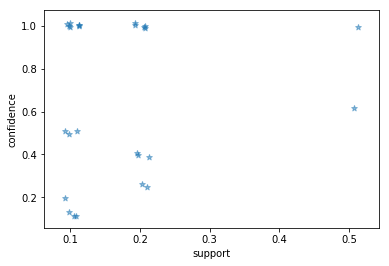

In [18]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [45]:
rules

antecedents           consequents  antecedent support  \
0              (Cookies)           (Choclates)                 0.2   
1            (Choclates)             (Cookies)                 0.5   
2            (Choclates)              (Pencil)                 0.5   
3               (Pencil)           (Choclates)                 0.8   
4                 (Coke)              (Eraser)                 0.2   
5               (Eraser)                (Coke)                 0.1   
6                 (Coke)              (Marker)                 0.2   
7               (Marker)                (Coke)                 0.5   
8              (Cookies)              (Pencil)                 0.2   
9               (Pencil)             (Cookies)                 0.8   
10              (Eraser)              (Pencil)                 0.1   
11              (Pencil)              (Eraser)                 0.8   
12  (Cookies, Choclates)              (Pencil)                 0.2   
13     (Cookies, Pencil)           (Choclates)                 0.2   
14   (Choclates, Pencil)             (Cookies)                 0.5   
15             (Cookies)   (Choclates, Pencil)                 0.2   
16           (Choclates)     (Cookies, Pencil)                 0.5   
17              (Pencil)  (Cookies, Choclates)                 0.8   
18   (Choclates, Marker)              (Pencil)                 0.1   
19              (Pencil)   (Choclates, Marker)                 0.8   
20        (Coke, Eraser)              (Pencil)                 0.1   
21        (Coke, Pencil)              (Eraser)                 0.1   
22      (Eraser, Pencil)                (Coke)                 0.1   
23                (Coke)      (Eraser, Pencil)                 0.2   
24              (Eraser)        (Coke, Pencil)                 0.1   
25              (Pencil)        (Coke, Eraser)                 0.8   

    consequent support  support  confidence   lift  leverage  conviction  
0                  0.5      0.2       1.000   2.00      0.10         inf  
1                  0.2      0.2       0.400   2.00      0.10    1.333333  
2                  0.8      0.5       1.000   1.25      0.10         inf  
3                  0.5      0.5       0.625   1.25      0.10    1.333333  
4                  0.1      0.1       0.500   5.00      0.08    1.800000  
5                  0.2      0.1       1.000   5.00      0.08         inf  
6                  0.5      0.1       0.500   1.00      0.00    1.000000  
7                  0.2      0.1       0.200   1.00      0.00    1.000000  
8                  0.8      0.2       1.000   1.25      0.04         inf  
9                  0.2      0.2       0.250   1.25      0.04    1.066667  
10                 0.8      0.1       1.000   1.25      0.02         inf  
11                 0.1      0.1       0.125   1.25      0.02    1.028571  
12                 0.8      0.2       1.000   1.25      0.04         inf  
13                 0.5      0.2       1.000   2.00      0.10         inf  
14                 0.2      0.2       0.400   2.00      0.10    1.333333  
15                 0.5      0.2       1.000   2.00      0.10         inf  
16                 0.2      0.2       0.400   2.00      0.10    1.333333  
17                 0.2      0.2       0.250   1.25      0.04    1.066667  
18                 0.8      0.1       1.000   1.25      0.02         inf  
19                 0.1      0.1       0.125   1.25      0.02    1.028571  
20                 0.8      0.1       1.000   1.25      0.02         inf  
21                 0.1      0.1       1.000  10.00      0.09         inf  
22                 0.2      0.1       1.000   5.00      0.08         inf  
23                 0.1      0.1       0.500   5.00      0.08    1.800000  
24                 0.1      0.1       1.000  10.00      0.09         inf  
25                 0.1      0.1       0.125   1.25      0.02    1.028571

In [19]:
rules=rules.values

In [46]:
import numpy as np
 
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules[i,0]:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules[i,1]:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

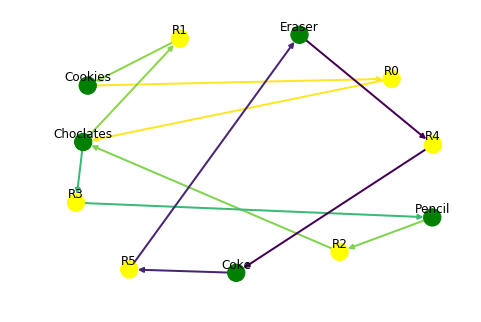

In [16]:
draw_graph (rules, 6)

In [17]:
rules

array([[frozenset({'Cookies'}), frozenset({'Choclates'}), 0.2, 0.5, 0.2,
        1.0, 2.0, 0.1, inf],
       [frozenset({'Choclates'}), frozenset({'Cookies'}), 0.5, 0.2, 0.2,
        0.4, 2.0, 0.1, 1.3333333333333335],
       [frozenset({'Pencil'}), frozenset({'Choclates'}), 0.8, 0.5, 0.5,
        0.625, 1.25, 0.09999999999999998, 1.3333333333333333],
       [frozenset({'Choclates'}), frozenset({'Pencil'}), 0.5, 0.8, 0.5,
        1.0, 1.25, 0.09999999999999998, inf],
       [frozenset({'Eraser'}), frozenset({'Coke'}), 0.1, 0.2, 0.1, 1.0,
        5.0, 0.08, inf],
       [frozenset({'Coke'}), frozenset({'Eraser'}), 0.2, 0.1, 0.1, 0.5,
        5.0, 0.08, 1.8],
       [frozenset({'Marker'}), frozenset({'Coke'}), 0.5, 0.2, 0.1, 0.2,
        1.0, 0.0, 1.0],
       [frozenset({'Coke'}), frozenset({'Marker'}), 0.2, 0.5, 0.1, 0.5,
        1.0, 0.0, 1.0],
       [frozenset({'Pencil'}), frozenset({'Cookies'}), 0.8, 0.2, 0.2,
        0.25, 1.25, 0.03999999999999998, 1.0666666666666667],
       [fr

### Assignment

1. Given to you is a Titanic dataset. You need to identify the rules for survival
2. Given to you is a transactions data, bring out the associations using apriori algorithm

In [18]:
tdata=pd.read_csv("titanic_data.csv")
tdata.head()

Class   Sex    Age Survived
0   3rd  Male  Child       No
1   3rd  Male  Child       No
2   3rd  Male  Child       No
3   3rd  Male  Child       No
4   3rd  Male  Child       No

In [19]:
Y=pd.get_dummies(data=tdata,columns=["Class","Sex","Age","Survived"])
Y.head()
#Y['ID']=Y.index


Class_1st  Class_2nd  Class_3rd  Class_Crew  Sex_Female  Sex_Male  \
0          0          0          1           0           0         1   
1          0          0          1           0           0         1   
2          0          0          1           0           0         1   
3          0          0          1           0           0         1   
4          0          0          1           0           0         1   

   Age_Adult  Age_Child  Survived_No  Survived_Yes  
0          0          1            1             0  
1          0          1            1             0  
2          0          1            1             0  
3          0          1            1             0  
4          0          1            1             0

In [20]:
Y[Y['Survived_Yes']==1]

Class_1st  Class_2nd  Class_3rd  Class_Crew  Sex_Female  Sex_Male  \
1490          1          0          0           0           0         1   
1491          1          0          0           0           0         1   
1492          1          0          0           0           0         1   
1493          1          0          0           0           0         1   
1494          1          0          0           0           0         1   
1495          0          1          0           0           0         1   
1496          0          1          0           0           0         1   
1497          0          1          0           0           0         1   
1498          0          1          0           0           0         1   
1499          0          1          0           0           0         1   
1500          0          1          0           0           0         1   
1501          0          1          0           0           0         1   
1502          0          1          0           0           0         1   
1503          0          1          0           0           0         1   
1504          0          1          0           0           0         1   
1505          0          1          0           0           0         1   
1506          0          0          1           0           0         1   
1507          0          0          1           0           0         1   
1508          0          0          1           0           0         1   
1509          0          0          1           0           0         1   
1510          0          0          1           0           0         1   
1511          0          0          1           0           0         1   
1512          0          0          1           0           0         1   
1513          0          0          1           0           0         1   
1514          0          0          1           0           0         1   
1515          0          0          1           0           0         1   
1516          0          0          1           0           0         1   
1517          0          0          1           0           0         1   
1518          0          0          1           0           0         1   
1519          1          0          0           0           1         0   
...         ...        ...        ...         ...         ...       ...   
2171          0          0          1           0           1         0   
2172          0          0          1           0           1         0   
2173          0          0          1           0           1         0   
2174          0          0          1           0           1         0   
2175          0          0          1           0           1         0   
2176          0          0          1           0           1         0   
2177          0          0          1           0           1         0   
2178          0          0          1           0           1         0   
2179          0          0          1           0           1         0   
2180          0          0          1           0           1         0   
2181          0          0          0           1           1         0   
2182          0          0          0           1           1         0   
2183          0          0          0           1           1         0   
2184          0          0          0           1           1         0   
2185          0          0          0           1           1         0   
2186          0          0          0           1           1         0   
2187          0          0          0           1           1         0   
2188          0          0          0           1           1         0   
2189          0          0          0           1           1         0   
2190          0          0          0           1           1         0   
2191          0          0          0           1           1         0   
2192          0          0     

In [21]:
items = apriori(Y, min_support=0.07, use_colnames=True)
rules = association_rules(items, metric="lift", min_threshold=1)

In [22]:
rules.head()

antecedents     consequents  antecedent support  consequent support  \
0     (Age_Adult)     (Class_1st)            0.950477            0.147660   
1     (Class_1st)     (Age_Adult)            0.147660            0.950477   
2     (Class_1st)  (Survived_Yes)            0.147660            0.323035   
3  (Survived_Yes)     (Class_1st)            0.323035            0.147660   
4    (Sex_Female)     (Class_3rd)            0.213539            0.320763   

    support  confidence      lift  leverage  conviction  
0  0.144934    0.152486  1.032680  0.004587    1.005694  
1  0.144934    0.981538  1.032680  0.004587    2.682493  
2  0.092231    0.624615  1.933584  0.044531    1.803390  
3  0.092231    0.285513  1.933584  0.044531    1.192940  
4  0.089050    0.417021  1.300090  0.020555    1.165114

In [23]:
x=rules[rules['consequents']==frozenset({'Survived_Yes'})]

In [24]:
x

antecedents     consequents  antecedent support  \
2               (Class_1st)  (Survived_Yes)            0.147660   
14             (Sex_Female)  (Survived_Yes)            0.213539   
24   (Age_Adult, Class_1st)  (Survived_Yes)            0.144934   
68  (Sex_Female, Age_Adult)  (Survived_Yes)            0.193094   

    consequent support   support  confidence      lift  leverage  conviction  
2             0.323035  0.092231    0.624615  1.933584  0.044531    1.803390  
14            0.323035  0.156293    0.731915  2.265745  0.087312    2.525187  
24            0.323035  0.089505    0.617555  1.911727  0.042686    1.770097  
68            0.323035  0.143571    0.743529  2.301699  0.081195    2.639542